[Text(0, 0, 'SomHit'),
 Text(0, 0, 'VisHit'),
 Text(0, 0, 'SomFA'),
 Text(0, 0, 'VisFA')]

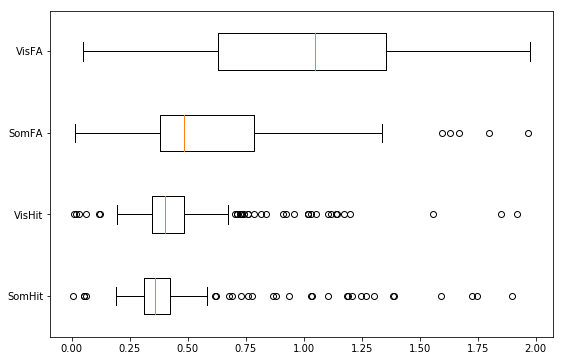

In [186]:
#Import master_log
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

#Create Reaction_time Whisker Plots
#Categories: SomHit, SomFA, VisHit, VisFA
#Data from stim_onset & FirstLick, combine sessions
#Category filter (temp): Non-claustrum (Code: sub = ... & (master_log.Category == 'NOTClaustrum')])

#Create a dictionary: session corresponding to trial types - SomHit, SomFFA, VisHit, VisFA
import numpy as np
import pandas as pd
N_trial_types = ['SomHit','SomFA','VisHit','VisFA']
mouse_uni = np.unique(master_log.mouse_name)
date_uni = np.unique(master_log.date)

#Sub-DataFrame for individual mouse & Dictionary for session and reaction times for needed trial types
session_sub = {}

for i in range(0, len(mouse_uni)):
    for j in range(0, len(date_uni)):
        sub = master_log[(master_log.mouse_name == mouse_uni[i][0]) & (master_log.date == date_uni[j][0]) & (master_log.Category == 'NOTClaustrum')]
        if (sub.empty == False):
            session_sub[str(mouse_uni[i][0])+','+str(date_uni[j][0])] = [sub[(sub['Stim/Block/Response'] == N_trial_types[0]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                         sub[(sub['Stim/Block/Response'] == N_trial_types[1]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                         sub[(sub['Stim/Block/Response'] == N_trial_types[2]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                         sub[(sub['Stim/Block/Response'] == N_trial_types[3]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick]
#Individual lists of FirstLick values for each needed trial types
SomHit = []
SomFA = []
VisHit = []
VisFA = []
len_session_sub = len(session_sub)
for i in session_sub:
    L1 = session_sub[i][0]
    for j in L1:
        SomHit.append(j)
    L2 = session_sub[i][1]
    for j in L2:
        SomFA.append(j)
    L3 = session_sub[i][2]
    for j in L3:
        VisHit.append(j)
    L4 = session_sub[i][3]
    for j in L4:
        VisFA.append(j)

#Create boxplots
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot([SomHit, VisHit, SomFA, VisFA], vert=False)
ax.set_yticklabels(['SomHit','VisHit','SomFA','VisFA'])